### Task 2 Synthetic dataset

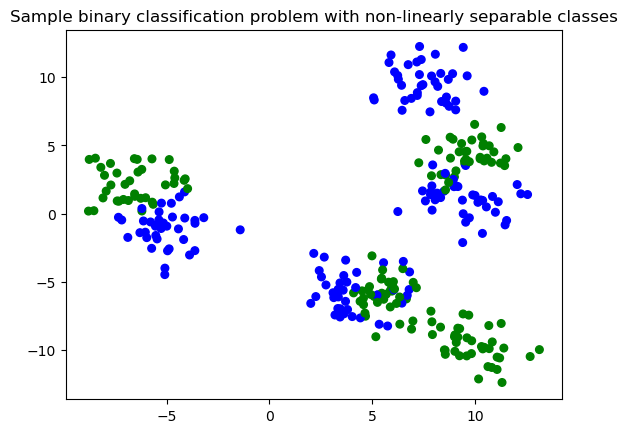

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed = 2021

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)


k_list = list(range(1,30,1))

scores = []

for k in k_list:    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    scores.append( knn.score(X_test_scaled, y_test) )  

k_best = k_list[np.argmax(scores)] # 'compute the best k'
score_best = np.max(scores) #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best, score_best ))

The best k = 18 , score = 0.9466666666666667


Call prediction for all grid values (precision of drawing = 0.05, you may configure to speed up e.g. precision=0.05)


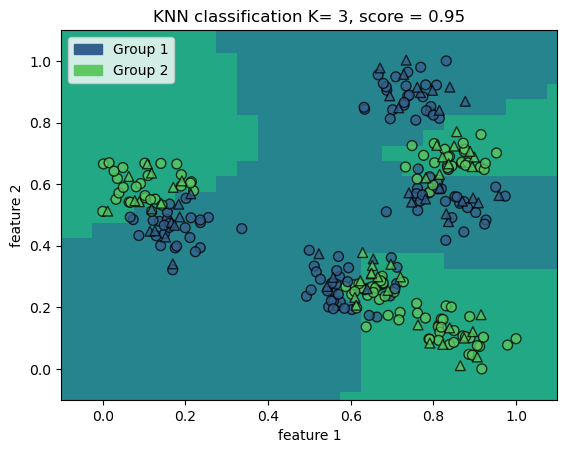

In [4]:
import ML_mst as mst

knn = KNeighborsClassifier(n_neighbors= 18)
knn.fit(X_train_scaled, y_train)

score = knn.score(X_test_scaled, y_test) 

mst.plot_decision_boundary(knn, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(3, score), 
                               precision=0.05,plot_symbol_size = 50)